### Wojciech Poniewierka 402224

# Laboratory 3

<br><br><br><br><br>
Import used libraries

In [1]:
from cmdstanpy import CmdStanModel
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import arviz as az

/usr/local/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
gen_quant = CmdStanModel(stan_file='code_1.stan')
samples = gen_quant.sample(fixed_param=True, 
                            iter_sampling=1000, 
                            iter_warmup=0, 
                            chains = 1)
df = samples.draws_pd()
df.head(20)

INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing
chain 1 |██████████| 00:00 Sampling completed


INFO:cmdstanpy:CmdStan done processing.


,lp__,accept_stat__,number_of_trials,y,p
0,0.0,0.0,50.0,11.0,0.228882
1,0.0,0.0,50.0,11.0,0.183224
2,0.0,0.0,50.0,6.0,0.185650
3,0.0,0.0,50.0,8.0,0.206677
4,0.0,0.0,50.0,5.0,0.212715
5,0.0,0.0,50.0,9.0,0.190739
6,0.0,0.0,50.0,8.0,0.194826
7,0.0,0.0,50.0,7.0,0.163687
8,0.0,0.0,50.0,3.0,0.141785
9,0.0,0.0,50.0,5.0,0.188488


0.20222000000000004


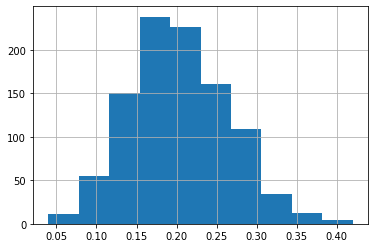

In [3]:
df["ratio"] = df["y"] / df["number_of_trials"]

df["ratio"].hist()
print(df["ratio"].mean())

Mean of the ratio seems to be conistent with prior knowledge as it is 0.2022.

In [9]:
gen_quant = CmdStanModel(stan_file='code_2.stan')
input_data = {
    "number_of_trials": 50,
    "y": 7
}
samples = gen_quant.sample(data=input_data,
                           fixed_param=True, 
                            iter_sampling=1000, 
                            iter_warmup=0, 
                            chains = 1)
df = samples.draws_pd()
df.head(20)

INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing
chain 1 |██████████| 00:00 Sampling completed


INFO:cmdstanpy:CmdStan done processing.


,lp__,accept_stat__,p,y_pred
0,0.0,0.0,0.121561,8.0
1,0.0,0.0,0.121561,9.0
2,0.0,0.0,0.121561,5.0
3,0.0,0.0,0.121561,4.0
4,0.0,0.0,0.121561,3.0
5,0.0,0.0,0.121561,8.0
6,0.0,0.0,0.121561,5.0
7,0.0,0.0,0.121561,3.0
8,0.0,0.0,0.121561,3.0
9,0.0,0.0,0.121561,6.0


0.11962000000000002


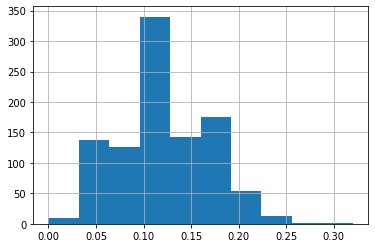

In [10]:
df["ratio"] = df["y_pred"] / input_data["number_of_trials"]

df["ratio"].hist()
print(df["ratio"].mean())

In [11]:
ratio_pred = az.summary(np.array(df["ratio"]), hdi_prob=0.94)
print(ratio_pred)

p_summary = az.summary(np.array(df["p"]), hdi_prob=0.94)
print(p_summary)

arviz - WARNING - Shape validation failed: input_shape: (1, 1000), minimum_shape: (chains=2, draws=4)
arviz - WARNING - Shape validation failed: input_shape: (1, 1000), minimum_shape: (chains=2, draws=4)


   mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  ess_tail  r_hat
x  0.12  0.046    0.04      0.2      0.001    0.001     972.0     978.0    NaN
    mean   sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  ess_tail  r_hat
x  0.122  0.0   0.122    0.122        0.0      0.0    1000.0    1000.0    NaN


In [13]:
p_mean = 0.2

lower_ratio_sum = (df["ratio"] < p_mean).sum()

lower_ratio_prob = lower_ratio_sum / len(df["ratio"])
print(lower_ratio_prob)

0.929
